<a href="https://colab.research.google.com/github/wooricho93/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [5]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
print(df.isnull())
print(df.isna())
## 열별, 행별 결측치 개수 확인
print(df.isnull().sum())
print(df.isnull().sum(axis = 1))
## 특정 열, 행 결측치 확인
print(df[df.isnull().any(axis = 1)])
print(df[df['나이'].isnull()])
## 결측치가 아닌 항목 확인
print(df.notnull())
## 결측치 비율
missing_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print(f'{missing_percentage:.2f}%')

      이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False
      이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False
이름    0
나이    1
도시    1
점수    1
dtype: int64
0    0
1    1
2    2
3    0
4    0
dtype: int64
    이름    나이    도시    점수
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
    이름  나이  도시  점수
2  박민수 NaN  인천 NaN
     이름     나이     도시     점수
0  True   True   True   True
1  True   True  False   True
2  True  False   True  False
3  True   True   True   True
4  True   True   True   True
15.00%


### 7-2 데이터 시각화를 이용한 결측치 찾기

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,838 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

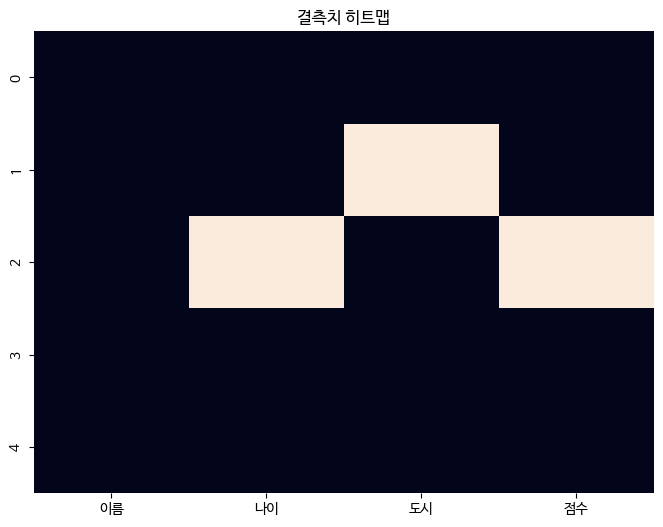

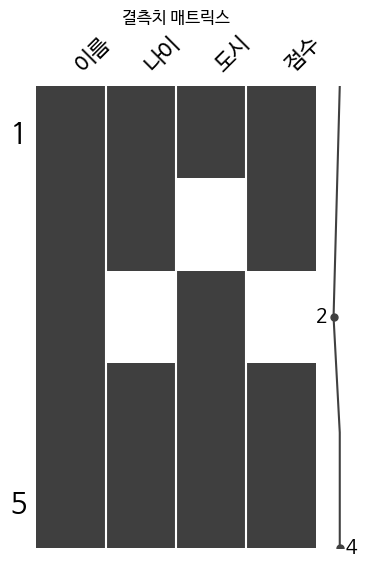

In [4]:
import numpy as np
import pandas as pd
### 시각화 라이브러리 임포트
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df, figsize = (4, 6))
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [5]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1
max = q3 + 1.5 * iqr
min = q1 - 1.5 * iqr

### IQR 통계량 출력
print(f'Q1 (25%): {q1:.2f}')
print(f'Q1 (75%): {q3:.2f}')
print(f'IQR: {iqr:.2f}')
print(f'(Q1 - 1.5 * IQR): {min:.2f}')
print(f'(Q3 * 1.5 * IQR): {max:.2f}')

Q1 (25%): 63.25
Q1 (75%): 85.00
IQR: 21.75
(Q1 - 1.5 * IQR): 30.62
(Q3 * 1.5 * IQR): 117.62


### 7-4 Z-점수를 통한 이상치 찾기

In [7]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산
average = df['점수'].mean()
std = df['점수'].std()
df['점수_Z'] = (df['점수'] - average) / std
### 임계값 설정 및 이상치 여부 판단
tmp = 2
df['이상치여부'] = df['점수_Z'].abs() > tmp
### 이상치 데이터 출력
print('=' * 50)
print(df)
print('=' * 50)
print(df[df['이상치여부'] == True])
### 이상치 비율 출력
percentage = df['이상치여부'].mean() * 100
print(f'이상치 비율: {percentage:.2f}')

      학번   점수      점수_Z  이상치여부
0   1001   72 -0.034475  False
1   1002   68 -0.089635  False
2   1003   75  0.006895  False
3   1004  282  2.861411   True
4   1005   64 -0.144794  False
5   1006   31 -0.599862  False
6   1007   78  0.048265  False
7   1008   69 -0.075845  False
8   1009   88  0.186164  False
9   1010   92  0.241324  False
10  1011   22 -0.723972  False
11  1012   84  0.131004  False
12  1013   61 -0.186164  False
13  1014  -90 -2.268444   True
14  1015  130  0.765341  False
15  1016   66 -0.117214  False
      학번   점수      점수_Z  이상치여부
3   1004  282  2.861411   True
13  1014  -90 -2.268444   True
이상치 비율: 12.50


### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [12]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1)

### 나이, 소득 평균값 대치 및 결과 출력
for col in ['나이', '소득']:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
print(df_cleaned[['나이', '소득']].isnull().sum())

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned[['지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method = 'linear')
print(df_cleaned[['지출', '평균구매횟수']].isnull().sum())

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64
나이    0
소득    0
dtype: int64
지출        0
평균구매횟수    0
dtype: int64


/tmp/ipython-input-2654403547.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
/tmp/ipython-input-2654403547.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method = 'linear')


### 7-6 DataFrame 값 변경

In [24]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul', '서울')
print(df['city'])
### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None: '미정', 'Incheon': '인천'})
print(df['city'])
### map을 이용한 값 변경
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['도시'] = df['city'].map(city_map)
print(df['도시'])
df['age_str'] = df['age'].map(lambda x: f'{x}살' if pd.notna(x) else '알 수 없음')
print(df['age_str'])
### apply 함수를 이용한 값 변경
df['age_apply'] = df['age'].map(lambda x: x * 2 if pd.notna(x) else None)
print(df['age_apply'])
### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row):
    raw_age = row['age']
    raw_score = row['score']
    age = raw_age if pd.notna(raw_age) else 0
    score = raw_score if pd.notna(raw_score) else 0
    return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis = 1)
print(df['age_plus_score'])
### loc 인덱스를 이용한 값 변경
df.loc[df['score'] < 90, 'score'] = 90
print(df)
### where 함수를 이용한 값 변경
df['age_where'] = df['age'].where(df['age'] >= 30, other = 0)
print(df['age_where'])


    age     city  score
0  25.0    Seoul   90.0
1  30.0     None   90.0
2   NaN  Incheon    NaN
3  22.0    Seoul   90.0
4  35.0  Daejeon   92.0
0     0.0
1    30.0
2     0.0
3     0.0
4    35.0
Name: age_where, dtype: float64


### 7-7 날짜 데이터 타입 다루기


In [27]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
print(df_date)
print(df_date['date'].dtype)
### 날짜 데이터 분리
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['day'] = df_date['date'].dt.day
df_date['weekday'] = df_date['date'].dt.day_name()
print(df_date)
### 날짜 데이터 포멧 변경


     date_str       date
0  2025-07-01 2025-07-01
1  2025-08-01 2025-08-01
2  2025-09-01 2025-09-01
datetime64[ns]
     date_str       date  year  month  day  weekday
0  2025-07-01 2025-07-01  2025      7    1  Tuesday
1  2025-08-01 2025-08-01  2025      8    1   Friday
2  2025-09-01 2025-09-01  2025      9    1   Monday


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

### 데이터 분포 시각화

In [28]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wooriicho","key":"9f2a8bdf65b7ec3ece00b9ff647df288"}'}

In [29]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [30]:
!kaggle competitions download -c store-sales-time-series-forecasting
!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 1.09GB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [31]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')
# 판매 데이터 살펴보기
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


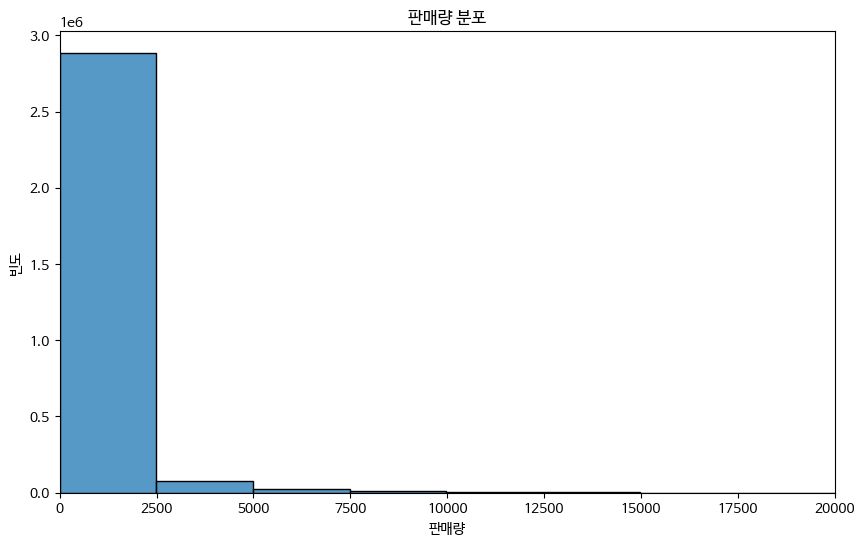

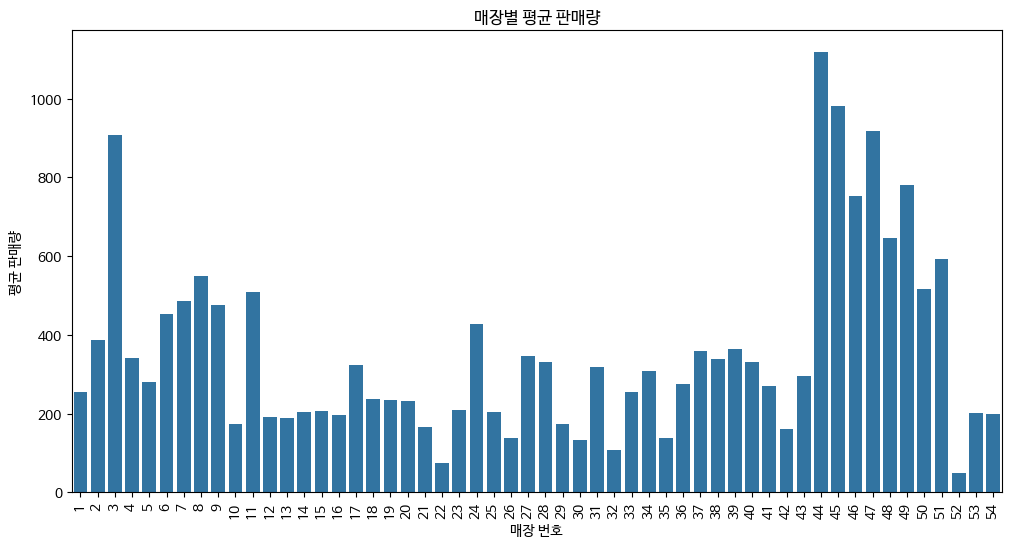

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 20000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

### 결측치 처리

In [42]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print('train:')
print(train.isnull().sum())
print('\nstores:')
print(stores.isnull().sum())
print('\ntransactions:')
print(transactions.isnull().sum())
print('\noil:')
print(oil.isnull().sum())
print('\nholidays_events:')
print(holidays_events.isnull().sum())

train:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

stores:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

transactions:
date            0
store_nbr       0
transactions    0
dtype: int64

oil:
date           0
dcoilwtico    43
dtype: int64

holidays_events:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


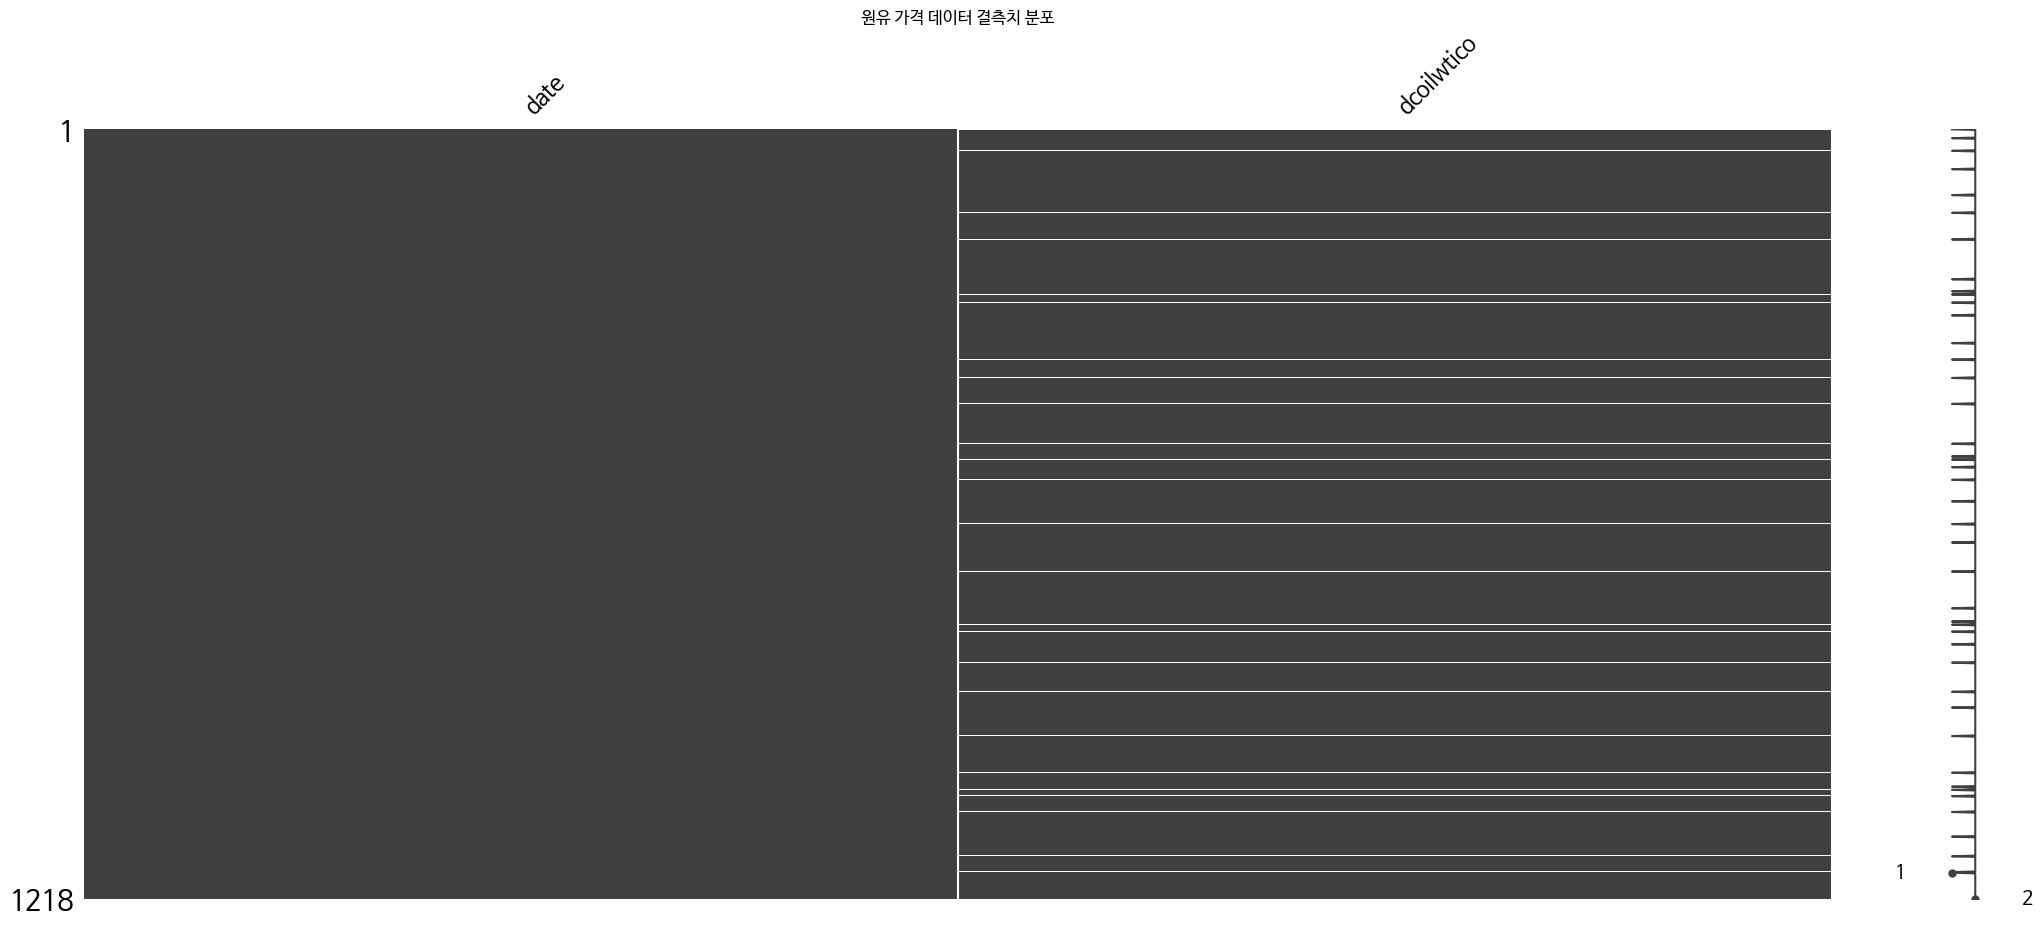

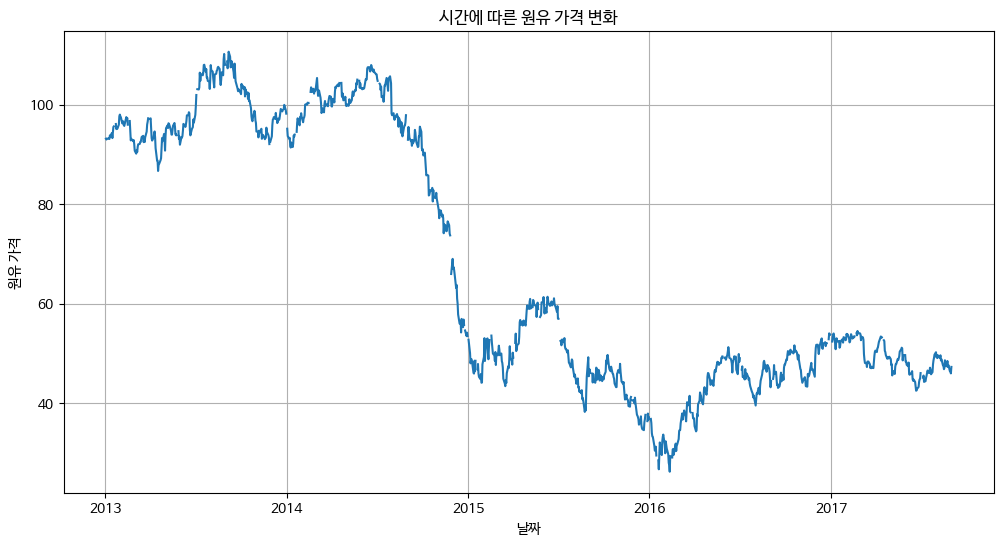

In [43]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

처리 전: 43
처리 후: 0


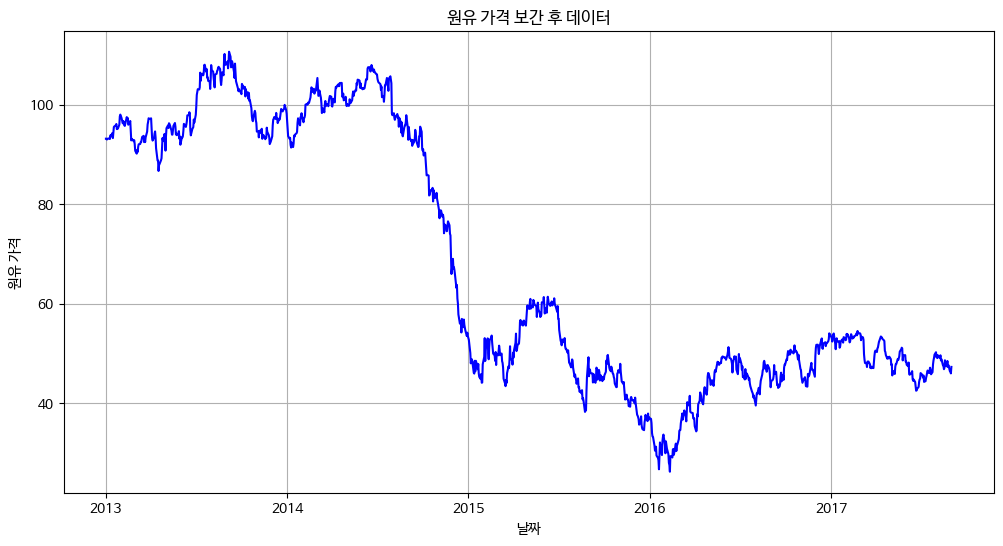

In [72]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method = 'linear', limit_direction = 'both')

print(f'처리 전: {oil['dcoilwtico'].isnull().sum()}')
print(f'처리 후: {oil_cleaned['dcoilwtico'].isnull().sum()}')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


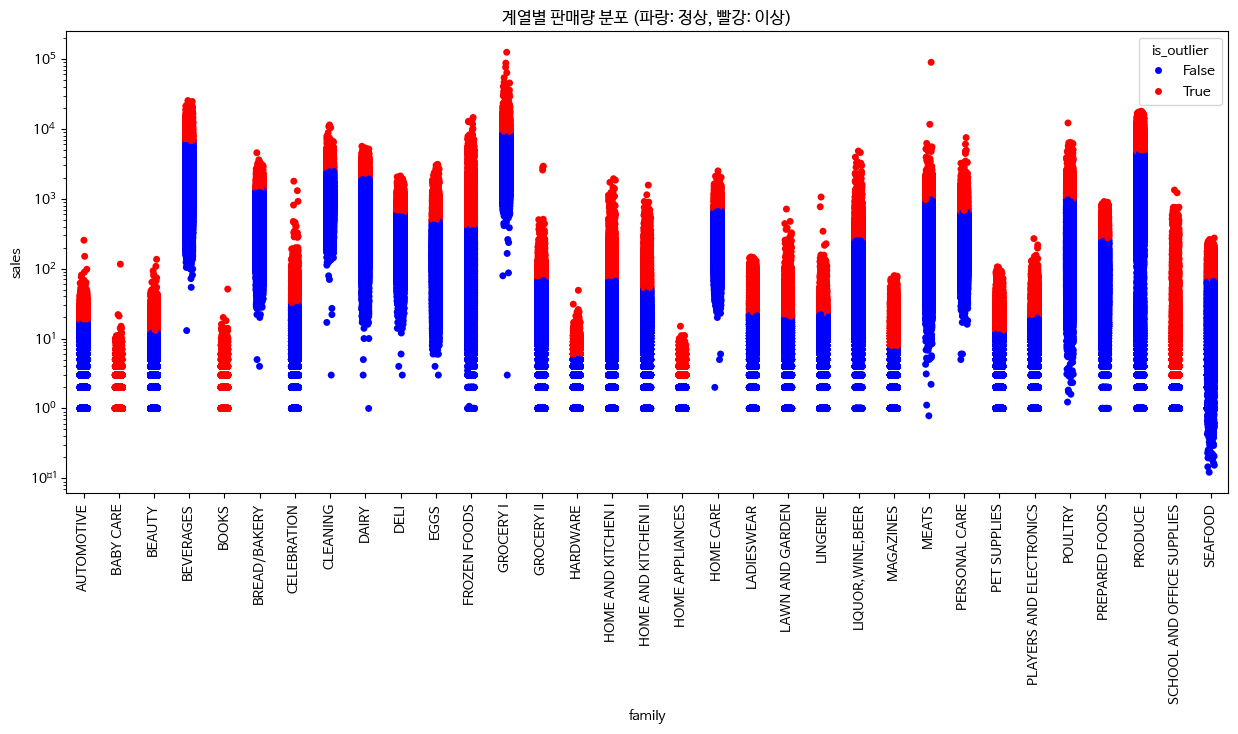

In [47]:
### 제품 계열별 판매 데이터 IQR 계산
family_bounds = train.groupby('family')['sales'].apply(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [55]:
### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


### 날짜 데이터 처리

In [61]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
oil_cleaned['date'] = pd.to_datetime(oil_cleaned['date'])

train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추출
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


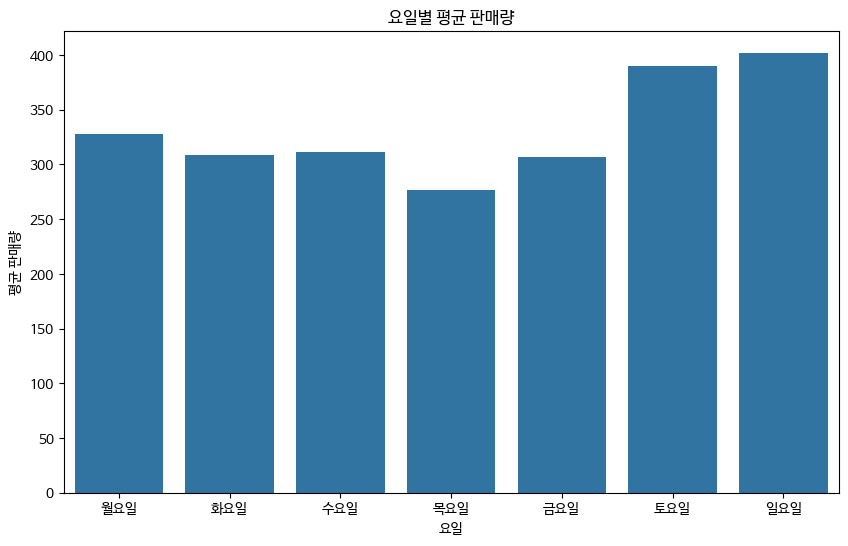

In [59]:
## 요일별 평균 판매량을 계산
day_sales  = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()

## 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'})
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [71]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(train_cleaned, transactions, on = ['date', 'store_nbr'], how = 'left')

## 매장 데이터 통합
train_with_store = pd.merge(train_with_trans, stores, on = 'store_nbr', how = 'left')

## 원유 데이터 통합
train_final = pd.merge(train_with_store, oil, on = 'date', how = 'left')

print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

최종 데이터셋 정보:
행 개수: 3000888, 열 개수: 19
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year', 'month', 'day', 'dayofweek', 'is_month_start', 'is_month_end', 'weekend', 'transactions', 'city', 'state', 'type', 'cluster', 'dcoilwtico']
   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013      1    1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013      1    1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013      1    1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013      1    1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013      1    1   

   dayofweek  is_month_start  is_month_end  weekend  transactions   city  \
0          1            True         False        0           NaN  Quito   
1          1            True         False        0           NaN  Quito   
2          1            True         Fa